# Lehká analýza

1. Celkový pohled na data, víc filtrování 
2. Základní statistiky: min, max, mean, median, standard deviation, korelace
3. statistické testy: test normality
4. lineární regrese

In [4]:
import pandas as pd

In [5]:
pokemon_df = pd.read_csv("data/Pokemon.csv")

## Základní údaje o datech

In [5]:
pokemon_df.shape

(807, 21)

In [6]:
pokemon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 21 columns):
id                        807 non-null int64
name                      807 non-null object
height                    807 non-null float64
weight                    807 non-null float64
color                     807 non-null object
shape                     807 non-null object
is baby                   807 non-null bool
type 1                    807 non-null object
type 2                    405 non-null object
hp                        807 non-null int64
attack                    807 non-null int64
defense                   807 non-null int64
sp. attack                807 non-null int64
sp. defense               807 non-null int64
speed                     807 non-null int64
total                     807 non-null int64
generation                807 non-null int64
evolves from              387 non-null float64
evolution group           807 non-null int64
fm gender ratio           807 

In [7]:
pokemon_df.columns

Index(['id', 'name', 'height', 'weight', 'color', 'shape', 'is baby', 'type 1',
       'type 2', 'hp', 'attack', 'defense', 'sp. attack', 'sp. defense',
       'speed', 'total', 'generation', 'evolves from', 'evolution group',
       'fm gender ratio', 'has_gender_differences'],
      dtype='object')

In [8]:
pokemon_df.describe()

,id,height,weight,hp,attack,defense,sp. attack,sp. defense,speed,total,generation,evolves from,evolution group,has_gender_differences
count,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,387.000000,807.000000,807.000000
mean,404.000000,1.162454,61.771128,68.748451,76.086741,71.726146,69.486989,70.013631,65.830235,421.892193,3.714994,368.457364,199.174721,0.121437
std,233.105126,1.081030,111.519355,26.032808,29.544598,29.730228,29.439715,27.292344,27.736838,111.038051,1.944148,233.367619,125.005530,0.326837
min,1.000000,0.100000,0.100000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,175.000000,1.000000,1.000000,1.000000,0.000000
25%,202.500000,0.600000,9.000000,50.000000,55.000000,50.000000,45.000000,50.000000,45.000000,321.500000,2.000000,158.500000,86.500000,0.000000
50%,404.000000,1.000000,27.000000,65.000000,75.000000,67.000000,65.000000,65.000000,65.000000,431.000000,4.000000,353.000000,192.000000,0.000000
75%,605.500000,1.500000,63.000000,80.000000,95.000000,89.000000,90.000000,85.000000,85.000000,500.000000,5.000000,574.500000,306.500000,0.000000
max,807.000000,14.500000,999.900000,255.000000,181.000000,230.000000,173.000000,230.000000,160.000000,720.000000,7.000000,803.000000,427.000000,1.000000


In [13]:
pokemon_df.iloc[pokemon_df["weight"].idxmax()]

id                            790
name                      cosmoem
height                        0.1
weight                      999.9
color                        blue
shape                        ball
is baby                     False
type 1                    Psychic
type 2                        NaN
hp                             43
attack                         29
defense                       131
sp. attack                     29
sp. defense                   131
speed                          37
total                         400
generation                      7
evolves from                  789
evolution group               413
fm gender ratio               0:0
has_gender_differences          0
Name: 789, dtype: object

In [16]:
pokemon_df.sort_values(by="weight", ascending=False).head()

,id,name,height,weight,color,shape,is baby,type 1,type 2,hp,...,defense,sp. attack,sp. defense,speed,total,generation,evolves from,evolution group,fm gender ratio,has_gender_differences
796,797,celesteela,9.2,999.9,green,humanoid,False,Steel,Flying,97,...,103,107,101,61,570,7,NaN,418,0:0,0
789,790,cosmoem,0.1,999.9,blue,ball,False,Psychic,NaN,43,...,131,29,131,37,400,7,789.0,413,0:0,0
382,383,groudon,3.5,950.0,red,upright,False,Ground,NaN,100,...,140,100,90,90,670,3,NaN,199,0:0,0
749,750,mudsdale,2.5,920.0,brown,quadruped,False,Ground,NaN,100,...,100,55,85,35,500,7,749.0,386,1:1,0
798,799,guzzlord,5.5,888.0,black,upright,False,Dark,Dragon,223,...,53,97,53,43,570,7,NaN,420,0:0,0


In [17]:
pokemon_df["weight"].mean()

61.771127633209424

In [18]:
pokemon_df["weight"].median()

27.0

In [21]:
pokemon_df["weight"].mode()

0    5.0
dtype: float64

## Statistické testy

In [9]:
import scipy.stats as st

In [10]:
# Import visualization tools
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
mpl.rcParams['figure.dpi'] = 100 # bigger figures, yayy!

Test normality

In [11]:
st.normaltest(pokemon_df["weight"])

NormaltestResult(statistic=820.8751735153749, pvalue=5.6133342769384294e-179)

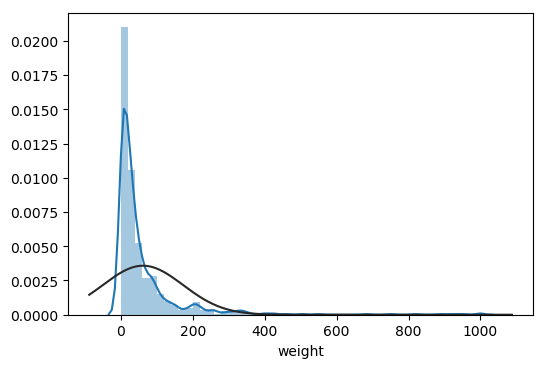

In [12]:
sns.distplot(pokemon_df["weight"], fit=st.norm)

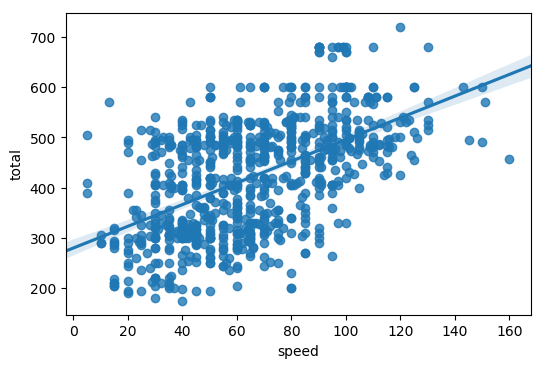

In [15]:
sns.regplot(x="speed", y="total", data=pokemon_df)